In [10]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np

In [11]:
# Carrega o conjunto de dados Stanford Dogs
dataset, info = tfds.load('stanford_dogs', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


In [12]:
# Define o número de classes e as dimensões das imagens
num_classes = info.features['label'].num_classes
img_altura, img_largura = 224, 224

In [13]:

# Define o pré-processamento das imagens
def redimensiona_imagem(imagem, label):
    imagem = tf.cast(imagem, tf.float32)
    imagem = tf.image.resize(imagem, (img_altura, img_largura))
    imagem /= 255.0
    return imagem, label

In [14]:
# Aplica o pré-processamento nas imagens de treinamento e teste
train_dataset = train_dataset.map(redimensiona_imagem)
test_dataset = test_dataset.map(redimensiona_imagem)


In [15]:
# Define o modelo da rede neural
modelo = tf.keras.Sequential([
    tf.keras.applications.MobileNetV2(input_shape=(img_altura, img_largura, 3), include_top=False),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dense(num_classes, activation='softmax')
])

# Congela as camadas convolucionais da MobileNetV2
modelo.layers[0].trainable = False

# Compila o modelo da rede neural
modelo.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Define o nome do arquivo de log
log_filename = 'log_treinamento.txt'

# Cria um objeto file para o arquivo de log
log_file = open(log_filename, 'w')

# Cria um objeto CSVLogger para gravar o log durante o treinamento
csv_logger = tf.keras.callbacks.CSVLogger(log_filename, separator='\t')


In [17]:
# Treina o modelo da rede neural
batch_size = 32
epocas = 30
historico = modelo.fit(train_dataset.batch(batch_size),
                       epochs=epocas,
                       validation_data=test_dataset.batch(batch_size),
                       callbacks=[csv_logger])

Epoch 1/30
375/375 [==============================] - 23s 59ms/step - loss: 1.4834 - accuracy: 0.6295 - val_loss: 0.8490 - val_accuracy: 0.7500
Epoch 2/30
375/375 [==============================] - 20s 54ms/step - loss: 0.5505 - accuracy: 0.8382 - val_loss: 0.7789 - val_accuracy: 0.7635
Epoch 3/30
375/375 [==============================] - 20s 54ms/step - loss: 0.3600 - accuracy: 0.9057 - val_loss: 0.7607 - val_accuracy: 0.7702
Epoch 4/30
375/375 [==============================] - 20s 53ms/step - loss: 0.2493 - accuracy: 0.9459 - val_loss: 0.7558 - val_accuracy: 0.7755
Epoch 5/30
375/375 [==============================] - 20s 53ms/step - loss: 0.1799 - accuracy: 0.9702 - val_loss: 0.7536 - val_accuracy: 0.7770
Epoch 6/30
375/375 [==============================] - 20s 54ms/step - loss: 0.1339 - accuracy: 0.9830 - val_loss: 0.7557 - val_accuracy: 0.7773
Epoch 7/30
375/375 [==============================] - 20s 54ms/step - loss: 0.1023 - accuracy: 0.9892 - val_loss: 0.7616 - val_accuracy:

In [18]:
# Fecha o arquivo de log
log_file.close()

# Avalia o modelo da rede neural
resultado_teste = modelo.evaluate(test_dataset.batch(batch_size))
print('Acurácia no conjunto de teste:', resultado_teste[1])

269/269 [==============================] - 9s 33ms/step - loss: 1.1146 - accuracy: 0.7730
Acurácia no conjunto de teste: 0.772960364818573


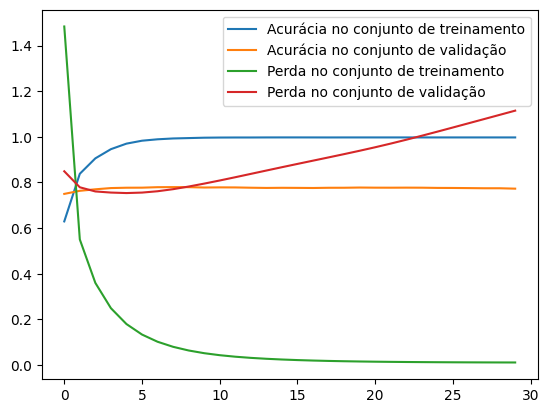

In [19]:
# Plota os gráficos de acurácia e perda
plt.plot(historico.history['accuracy'], label='Acurácia no conjunto de treinamento')
plt.plot(historico.history['val_accuracy'], label='Acurácia no conjunto de validação')
plt.plot(historico.history['loss'], label='Perda no conjunto de treinamento')
plt.plot(historico.history['val_loss'], label='Perda no conjunto de validação')
plt.legend()
plt.show()


In [21]:

# Salva o modelo
modelo.save('modelo_dogs.h5')